In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from PIL import Image
from facial_features.extractor import *

In [311]:
id = 'ID633_UNIFESP_S28_pain'

In [312]:
img = Image.open(f'Datasets\DatasetFaces\Images\{id}.jpg')
img = img.resize((512,512))

In [313]:
with open(f'Datasets\DatasetFaces\Landmarks\{id}.pkl', 'rb') as f:
    keypoints_coords = np.array(pickle.load(f))

In [314]:
left_eye = keypoints_coords[[35,41,42,39,37,36]]
right_eye = keypoints_coords[[89,95,96,93,91,90]]
mouth = keypoints_coords[[65,66,62,70,69,57,60,54]]

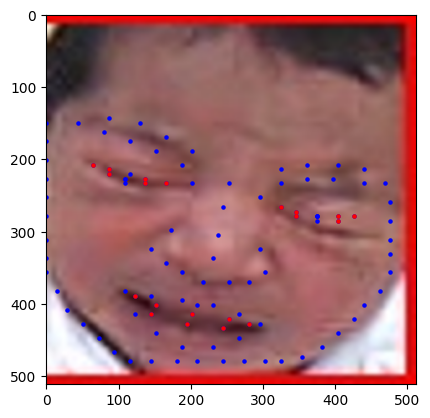

In [315]:
plt.imshow(img)
plt.scatter(keypoints_coords[:, 0], keypoints_coords[:, 1], s=5, c='blue')
plt.scatter(left_eye[:, 0], left_eye[:, 1], s=5, c='red')
plt.scatter(right_eye[:, 0], right_eye[:, 1], s=5, c='red')
plt.scatter(mouth[:, 0], mouth[:, 1], s=5, c='red')

In [316]:
left_eye_ear = keypoints_coords[[35,41,42,39,37,36]]
ear_left = compute_ear(left_eye_ear)

right_eye_ear = keypoints_coords[[89,95,96,93,91,90]]
ear_right = compute_ear(right_eye_ear)

In [317]:
print(f'Left EAR: {ear_left}')
print(f'Right EAR: {ear_right}')

Left EAR: 0.06217808595383176
Right EAR: 0.06367256209659726


In [318]:
if ear_left < 0.16:
    print("Eye is likely closed")
else:
    print("Eye is likely open")

Eye is likely closed


In [319]:
if ear_right < 0.16:
    print("Eye is likely closed")
else:
    print("Eye is likely open")

Eye is likely closed


In [320]:
mout_mar = keypoints_coords[[65,66,62,70,69,57,60,54]]
mar = compute_mar(mout_mar)

In [321]:
print(f'MAR: {mar}')

MAR: 0.1362120333312284


In [322]:
if mar < 0.20:
    print("Mouth is likely closed")
else:
    print("Mouth is likely open")

Mouth is likely closed
